In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid=pd.read_csv('/covid_19_india.csv')

FileNotFoundError: ignored

In [4]:
covid.head()#default first five output

NameError: ignored

In [ ]:
covid.tail()#last five

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1473,1474,30/04/20,5:00 PM,Telengana,-,-,367,26,1012
1474,1475,30/04/20,5:00 PM,Tripura,-,-,2,0,2
1475,1476,30/04/20,5:00 PM,Uttarakhand,-,-,36,0,55
1476,1477,30/04/20,5:00 PM,Uttar Pradesh,-,-,513,39,2203
1477,1478,30/04/20,5:00 PM,West Bengal,-,-,124,22,758


In [ ]:
covid['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#', 'Jharkhand#'],
      dtype=object)

In [ ]:
df=covid.loc[(covid['State/UnionTerritory']=='Tamil Nadu')]
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
61,62,07/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
67,68,08/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
79,80,09/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
94,95,10/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
105,106,11/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1


In [ ]:
df2=covid.loc[(covid['State/UnionTerritory']=='Mizoram')]
df2.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
352,353,25/03/20,6:00 PM,Mizoram,1,0,0,0,1
382,383,26/03/20,6:00 PM,Mizoram,1,0,0,0,1
409,410,27/03/20,10:00 AM,Mizoram,1,0,0,0,1
436,437,28/03/20,6:00 PM,Mizoram,1,0,0,0,1
463,464,29/03/20,7:30 PM,Mizoram,-,-,0,0,1


In [ ]:
#pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
cured_rate=go.Scatter(x=df2['Date'],y=df2['Cured'],name='Cured Rate')
death_rate=go.Scatter(x=df2['Date'],y=df2['Deaths'],name='Death Rate')
py.iplot([cured_rate,death_rate])

In [ ]:
#pip install plotly
import plotly.offline as py
import plotly.graph_objs as go


In [ ]:
cured_rate=go.Scatter(x=df['Date'],y=df['Cured'],name='Cured Rate')
death_rate=go.Scatter(x=df['Date'],y=df['Deaths'],name='Death Rate')
py.iplot([cured_rate,death_rate])

In [ ]:
df1=covid.loc[(covid['State/UnionTerritory']=='Kerala')]
df1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
cured_rate=go.Scatter(x=df1['Date'],y=df1['Cured'],name='Cured Rate')
death_rate=go.Scatter(x=df1['Date'],y=df1['Deaths'],name='Death Rate')
py.iplot([cured_rate,death_rate])


In [ ]:
df1=df[['Confirmed']]
df1 = df1.values

In [ ]:
train_size = int(len(df1) * 0.80)
test_size = len(df1) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]
print(len(train), len(test))

44 11


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], [] 
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 2
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)
#trainX

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [ ]:
model.fit(trainX,trainY)


LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(normalize=False)

In [ ]:
predict1=model.predict(testX)

In [ ]:
df = pd.DataFrame({'Actual': testY.flatten(), 'Predicted': predict1.flatten()})
df

,Actual,Predicted
0,1596,1599.490382
1,1629,1686.309258
2,1683,1710.106863
3,1755,1771.200566
4,1821,1850.234222
5,1885,1917.226354
6,1937,1983.114185
7,2058,2034.132508


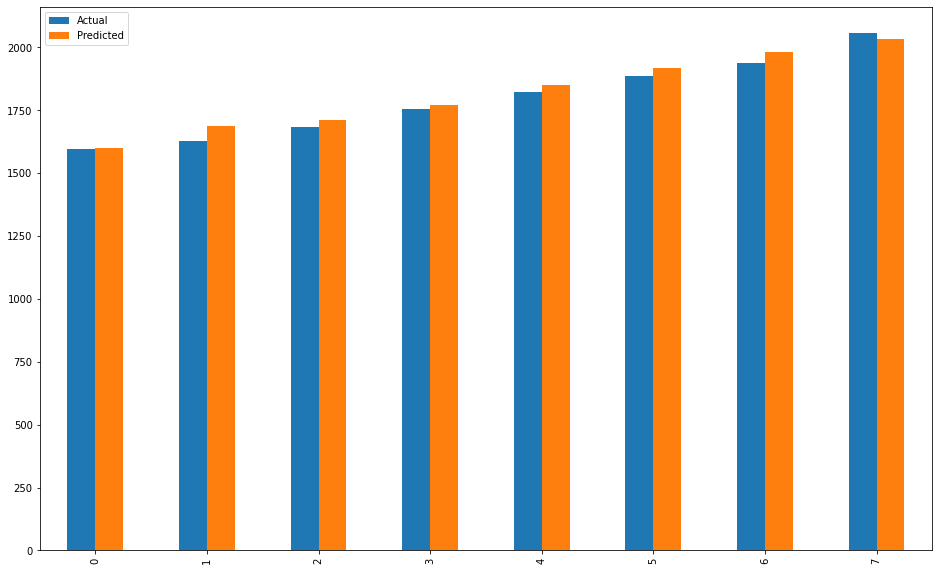

In [ ]:
df.plot(kind='bar',figsize=(16,10))